      Time  Displacement      Force
0    0.000        0.0000     0.0884
1    0.020        0.0001     0.1368
2    0.040        0.0013     0.9224
3    0.054        0.0050     3.5567
4    0.061        0.0084     6.0717
..     ...           ...        ...
383  2.905        2.3755  1026.0951
384  2.921        2.3892  1028.6454
385  2.939        2.4040  1031.1765
386  2.958        2.4195  1033.7180
387  2.973        2.4319  1035.7759

[388 rows x 3 columns]


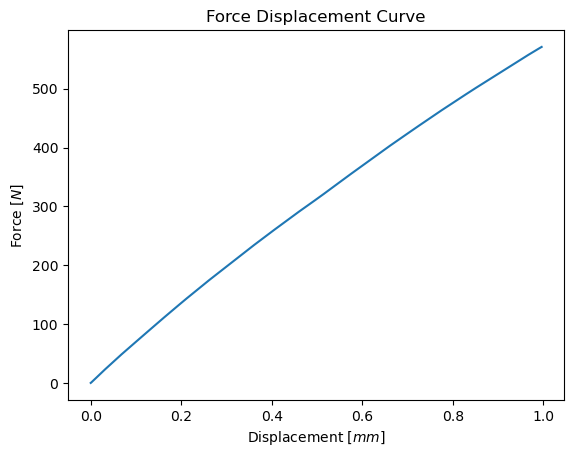

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# specimen1 = pd.read_csv('specimen1.csv')
# specimen2 = pd.read_csv('specimen2.csv')
# specimen3 = pd.read_csv('specimen3.csv')

data = pd.read_csv('tensile-test-PLA.csv')

# process specimen data to extract data up to 1 mm

FEA_data = pd.read_csv('FEA-FPU50-tensile.csv') # FEA data (includes PLA data)

data1 = data[data['Displacement'] < 1]



plt.figure()
plt.plot(data1['Displacement'], data1['Force'])
plt.title("Force Displacement Curve")
plt.xlabel("Displacement $[mm]$")
plt.ylabel("Force $[N]$")

print(data)

In [2]:

specimen_thickness = 3.4 # in mm
specimen_width = 6 # in mm

def stress_strain(force, displacement):
    area = specimen_thickness * specimen_width # cross sectional area of the specimen

    stress = force / area
    strain = displacement / 65 # change in length / original: dog bone

    return stress, strain

stress, strain = stress_strain(data1['Force'], data1['Displacement'])

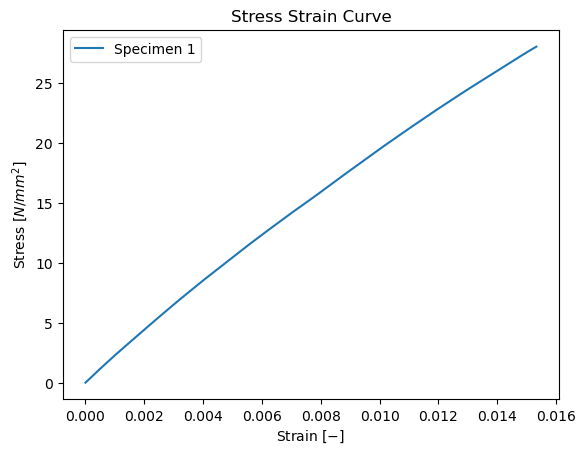

In [3]:
plt.figure()
plt.plot(strain, stress)

plt.title("Stress Strain Curve")
plt.xlabel("Strain $[-]$")
plt.ylabel("Stress $[N/mm^2]$")
plt.legend(['Specimen 1', 'Specimen 2', 'Specimen 3'])

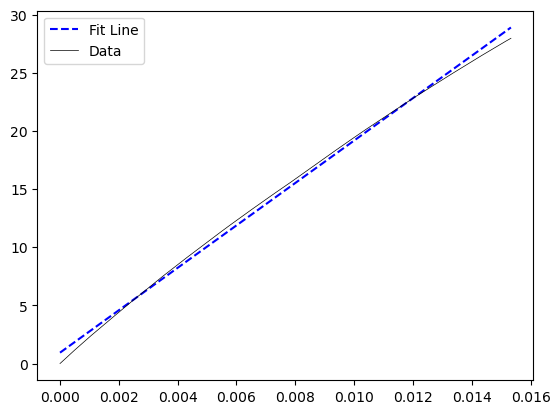

ASTM Type IV: PLA Young's Modulus (in MPa) =  [1825.35879778]


In [4]:
model = LinearRegression()

stress = np.array(stress).reshape(-1, 1) # using specimen 2
strain = np.array(strain).reshape(-1, 1)
model.fit(strain, stress)

fit_line_data = model.predict(strain)

plt.figure()
plt.plot(strain, fit_line_data, 'b--', label = 'Fit Line')
plt.plot(strain, stress, 'k-', label = 'Data', linewidth = 0.5)
plt.legend()
plt.show()

print("ASTM Type IV: PLA Young's Modulus (in MPa) = ", model.coef_[0])

In [5]:
force_data = FEA_data['ForcePLA']
disp_data = FEA_data['DispPLA']
new_data = FEA_data[FEA_data['DispPLA'] < 1] # displacement less than 1 mm

new_force_data = new_data['ForcePLA']
new_disp_data = new_data['DispPLA']

new_data
def stress_strain_FEA(force, displacement):
    area = specimen_thickness * specimen_width # cross sectional area of the specimen

    stress = force / area
    strain = displacement / 33 # change in length / original: FEA model

    return stress, strain

stress1, strain1 = stress_strain_FEA(new_force_data, new_disp_data)

# print(stress)
# print(strain)

stress_strain_data = {'Stress':stress1, 'Strain': strain1}
df = pd.DataFrame(stress_strain_data)
# df

area = specimen_thickness * specimen_width
Youngs_modulus = (df.iloc[-1]['Stress'] - df.iloc[0]['Stress']) / (df.iloc[-1]['Strain'] - df.iloc[0]['Strain'])
print(f'FEA: {Youngs_modulus} MPa')
print("ASTM Type IV: PLA Young's Modulus = ", model.coef_[0], 'MPa')

FEA: 1793.4197093720416 MPa
ASTM Type IV: PLA Young's Modulus =  [1825.35879778] MPa
